<h1><center>Network graph visualisation with networkx</center></h1>

Example script to visualize an ownership structure using networkx.

<h2>1. Source data</h2>

In [1]:
# Source data is a list of biggest shareholders of Germany DAX 30 & MDAX companies

import pandas as pd

df1 = pd.read_excel('DAX.xls')
df1.head()

,ID,Type,Company,Owner,Share
0,1.0,DAX,adidas,"BlackRock, Inc.",6.06
1,2.0,DAX,adidas,"Southeastern Asset Management, Inc.",2.94
2,3.0,DAX,adidas,"The Capital Group Companies, Inc.",3.02
3,4.0,DAX,adidas,"Thornburg Investment Management, Inc.",2.73
4,5.0,DAX,adidas,FMR LLC,5.31


<h2>2. Graph visualisation with networkx</h2>

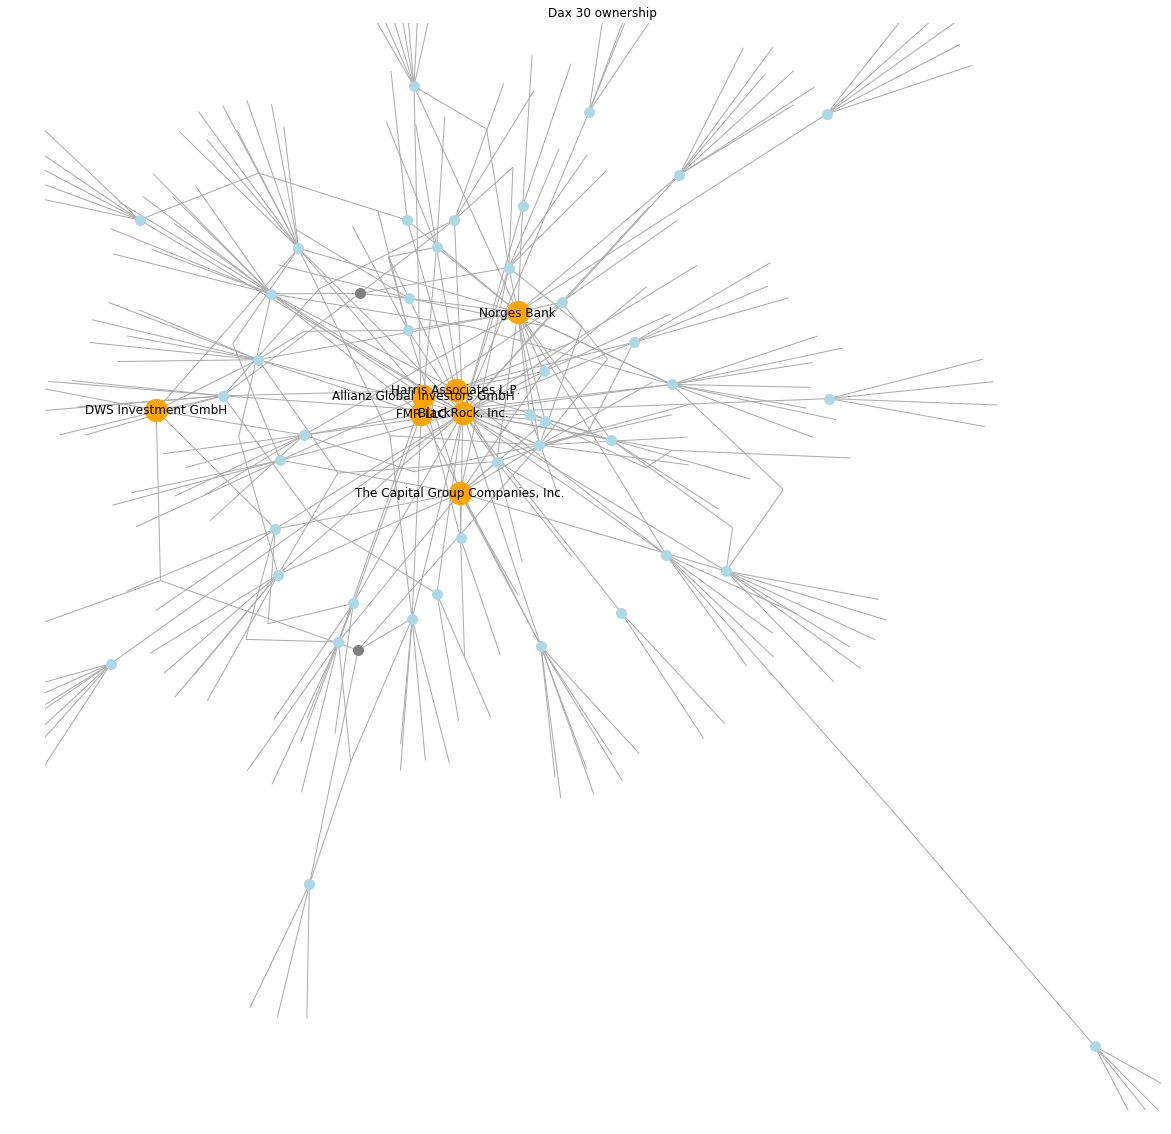

BlackRock, Inc.                      38
The Capital Group Companies, Inc.    14
FMR LLC                               8
Harris Associates L.P.                7
Norges Bank                          21
Allianz Global Investors GmbH        10
DWS Investment GmbH                   6
Name: Owner, dtype: int64

In [5]:
import matplotlib.pyplot as plt
import networkx as nx



# Create a canvas and a networkx graph

plt.figure(figsize=(20, 20))
g = nx.from_pandas_edgelist(df1, source='Owner', target='Company')

# Pick alayout

layout = nx.spring_layout(g,iterations=100)

# Draw the network, include only owners and companies with > 3 edges, label high-degree owners

nodelist_companies = [node for node in g.nodes() if node in df1.Company.unique() and df1.Company.value_counts()[node] > 3]
nodelist_owners = [node for node in g.nodes() if node in df1.Owner.unique() and df1.Owner.value_counts()[node] > 3]
nodelist_high_degree_owners = [node for node in g.nodes() if node in df1.Owner.unique() and df1.Owner.value_counts()[node] > 5]

nx.draw_networkx_nodes(g, layout, nodelist=nodelist_companies, node_size=100, node_color='lightblue')
nx.draw_networkx_nodes(g, layout, nodelist=nodelist_owners, node_size=100, node_color='grey')
nx.draw_networkx_nodes(g, layout, nodelist=nodelist_high_degree_owners, node_size=500, node_color='orange')
nx.draw_networkx_edges(g, layout, edge_color='#AAAAAA')
nx.draw_networkx_labels(g, layout, labels=dict(zip(nodelist_high_degree_owners, nodelist_high_degree_owners)))

# print network without axis

plt.axis('off')
plt.title("Dax 30 ownership")
plt.show()

# print high-degree owners

df1.Owner.value_counts()[nodelist_high_degree_owners]

<h2>3. References</h2>

- Pandas: https://pandas.pydata.org/
- NetworkX: https://networkx.github.io/documentation/stable/
- vis.js formatting details: https://visjs.github.io/vis-network/docs/network/